In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

import warnings
warnings.filterwarnings(action= "ignore")

plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv("Downloads/final df_.csv", index_col = 0)

In [11]:
df.head(3)

,pid,uid,brand,product_name,product_type,color,size,price,release_price,datetime,date,location1,location2,status,used,name
0,169499712,10473233,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,265,190000,129000,2021-11-11 19:58:01,2021-11-11,인천광역시,남동구,0,2,(가격내림)나이키 덩크 하이 레트로 챔피언쉽 네이비 265사이즈 팔아요.
1,169629181,8587620,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,260,220000,129000,2021-11-11 19:50:49,2021-11-11,서울특별시,금천구,0,2,[260] 나이키 덩크하이 레트로 챔피언쉽 네이비
2,169097255,76575156,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,260,160000,129000,2021-11-11 18:56:55,2021-11-11,인천광역시,부평구,0,1,나이키 덩크하이 레트로 챞피언쉽 네이비 260


In [293]:
len(set(df["product_name"]))

26

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7621 entries, 0 to 7620
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pid            7621 non-null   int64 
 1   uid            7621 non-null   int64 
 2   brand          7621 non-null   object
 3   product_name   7621 non-null   object
 4   product_type   7621 non-null   object
 5   color          7621 non-null   object
 6   size           7621 non-null   int64 
 7   price          7621 non-null   int64 
 8   release_price  7621 non-null   int64 
 9   datetime       7621 non-null   object
 10  date           7618 non-null   object
 11  location1      7621 non-null   object
 12  location2      7579 non-null   object
 13  status         7621 non-null   int64 
 14  used           7621 non-null   int64 
 15  name           7621 non-null   object
dtypes: int64(7), object(9)
memory usage: 1012.2+ KB


In [203]:
df1 =df[(df["price"]>=100000) & (df["price"]<=3590000)]

In [12]:
# 제품별 df 프레임 구축 
df_n = df1[df1["brand"] == "나이키"]

In [204]:
df_j = df1[df1["brand"]== "조던"] 

In [205]:
df_n.groupby("product_name")["price"].median()

product_name
나이키 덩크로우 골든로드       156000
나이키 덩크로우 라이트본       260000
나이키 덩크로우 바시티그린      300000
나이키 덩크로우 범고래        310000
나이키 덩크로우 유니버시티블루    250000
나이키 덩크로우 코스트        311000
나이키 덩크하이 네이비        195000
나이키 덩크하이 범고래        249500
나이키 덩크하이 오렌지        175000
Name: price, dtype: int64

In [206]:
df_n.groupby("product_name")["release_price"].median()

product_name
나이키 덩크로우 골든로드       119000
나이키 덩크로우 라이트본       119000
나이키 덩크로우 바시티그린      119000
나이키 덩크로우 범고래        119000
나이키 덩크로우 유니버시티블루    119000
나이키 덩크로우 코스트        119000
나이키 덩크하이 네이비        129000
나이키 덩크하이 범고래        129000
나이키 덩크하이 오렌지        129000
Name: release_price, dtype: int64

In [127]:
# 한글 폰트 설정 
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

plt.rc('font', family='gulrim')

In [128]:
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :

    plt.rc("font", family="Malgun Gothic")

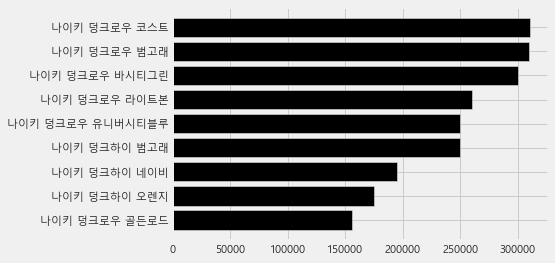

In [266]:
fig , ax  = plt.subplots()

ax.barh(df_n.groupby("product_name")["price"].median().sort_values(ascending =True).index, 
        df_n.groupby("product_name")["price"].median().sort_values(ascending =True).values, color ="black")


plt.show()

product_name
나이키 덩크하이 네이비        129000
나이키 덩크하이 범고래        129000
나이키 덩크하이 오렌지        129000
나이키 덩크로우 골든로드       119000
나이키 덩크로우 라이트본       119000
나이키 덩크로우 바시티그린      119000
나이키 덩크로우 범고래        119000
나이키 덩크로우 유니버시티블루    119000
나이키 덩크로우 코스트        119000
Name: release_price, dtype: int64

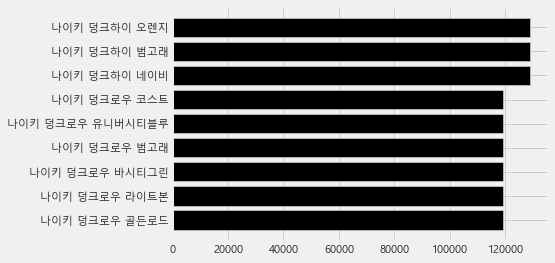

In [264]:
fig , ax  = plt.subplots()

ax.barh(df_n.groupby("product_name")["release_price"].median().sort_values(ascending =True).index, 
       df_n.groupby("product_name")["release_price"].median().sort_values(ascending = True).values, color ="black")

df_n.groupby("product_name")["release_price"].median().sort_values(ascending =False)

In [209]:
# 새상품 중고 상품 나누기 

df_n_new = df_n[df_n["used"]== 2 ] 
df_n_used = df_n[df_n["used"]== 1 ] 

df_n_new_sub = df_n_new.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()
df_n_used_sub = df_n_used.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()

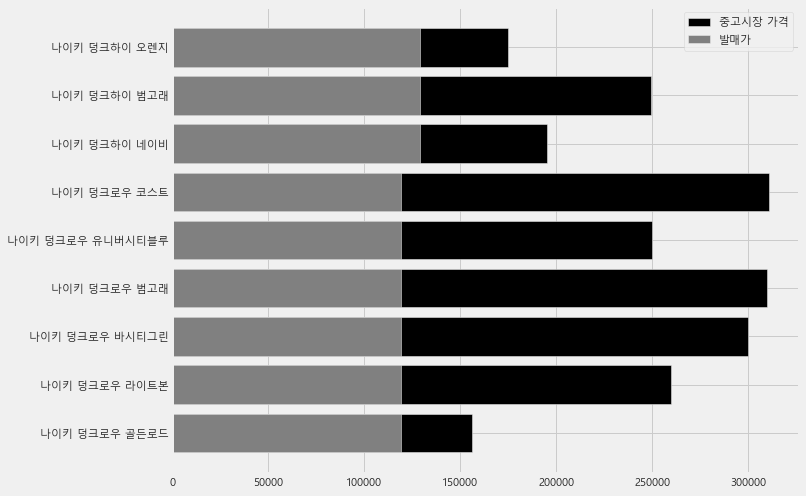

In [265]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_n.groupby("product_name")["price"].median().index, 
        df_n.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_n.groupby("product_name")["release_price"].median().index, 
       df_n.groupby("product_name")["release_price"].median().values, label ="발매가", color = "gray")

plt.legend()
plt.show()


In [211]:
sub = df_n.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()

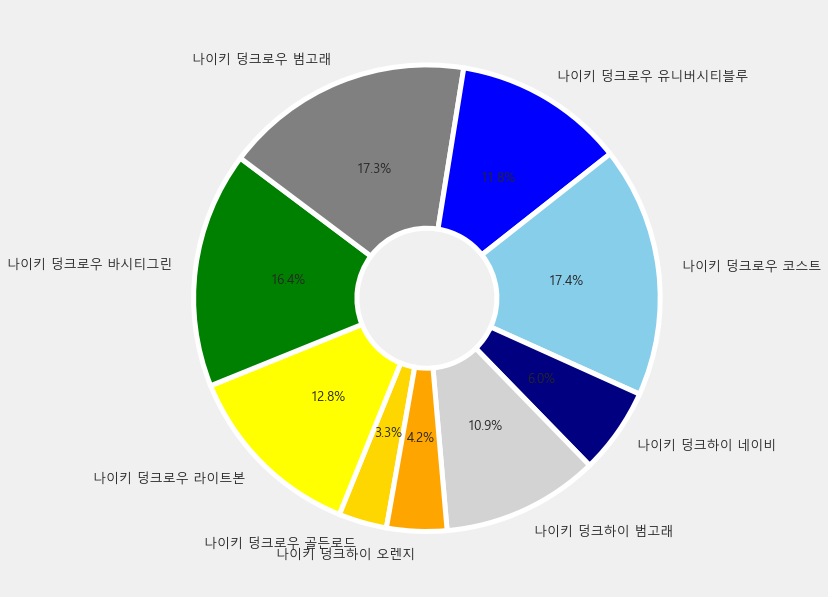

In [212]:
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gold","yellow","green","gray","blue","skyblue","navy", "lightgray", "orange"]

ax.pie(x = sub, labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

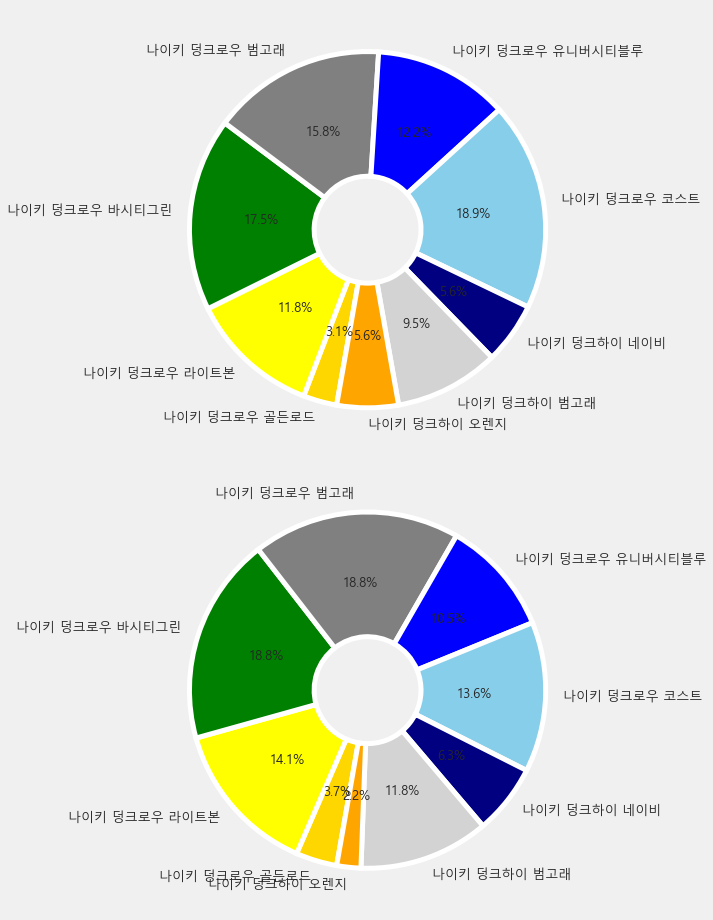

In [285]:
fig , axes  = plt.subplots(2,1, figsize = (15,13))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gold","yellow","green","gray","blue","skyblue","navy", "lightgray", "orange"]

axes[0].pie(x = df_n_new_sub,labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

axes[1].pie(x = df_n_used_sub, labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다


fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.tight_layout()
plt.show()

In [214]:
df_j.groupby("product_name")["price"].median().sort_values(ascending =False)

product_name
조던 1 로우 트레비스 스캇    1635000
조던1 하이 다크모카         500000
조던1 미드 스모크그레이       380000
조던 1 로우 스타피쉬        310000
조던1 하이 하이퍼로얄        299500
조던 1 로우 울프그레이       290000
조던1 미드 그레이포그        290000
조던1 미드 울프그레이        280000
조던1 하이 스모크그레이       262000
조던1 미드 짐레드          170000
Name: price, dtype: int64

In [215]:
df_j.groupby("product_name")["release_price"].median().sort_values(ascending =False)

product_name
조던1 하이 다크모카        199000
조던1 하이 스모크그레이      199000
조던1 하이 하이퍼로얄       199000
조던 1 로우 트레비스 스캇    189000
조던 1 로우 스타피쉬       159000
조던1 미드 그레이포그       139000
조던1 미드 스모크그레이      139000
조던1 미드 울프그레이       139000
조던1 미드 짐레드         139000
조던 1 로우 울프그레이      119000
Name: release_price, dtype: int64

In [216]:
sub_j = df_j.groupby("product_name")["price"].median().sort_values(ascending =False) - df_j.groupby("product_name")["release_price"].median().sort_values(ascending =False)

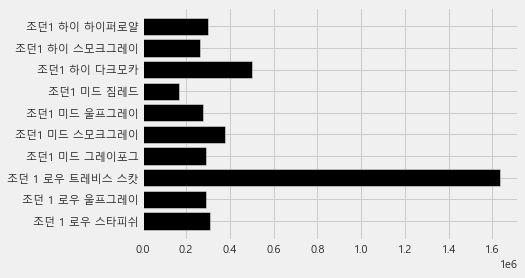

In [262]:
fig , ax  = plt.subplots()

ax.barh(df_j.groupby("product_name")["price"].median().index, 
        df_j.groupby("product_name")["price"].median().values, color ="black")


plt.show()

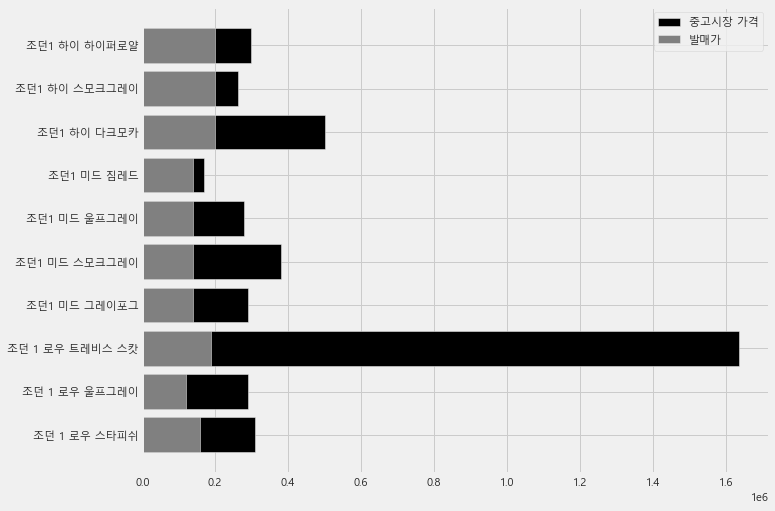

In [263]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_j.groupby("product_name")["price"].median().index, 
        df_j.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_j.groupby("product_name")["release_price"].median().index, 
       df_j.groupby("product_name")["release_price"].median().values, label ="발매가", color = "gray")

plt.legend()
plt.show()


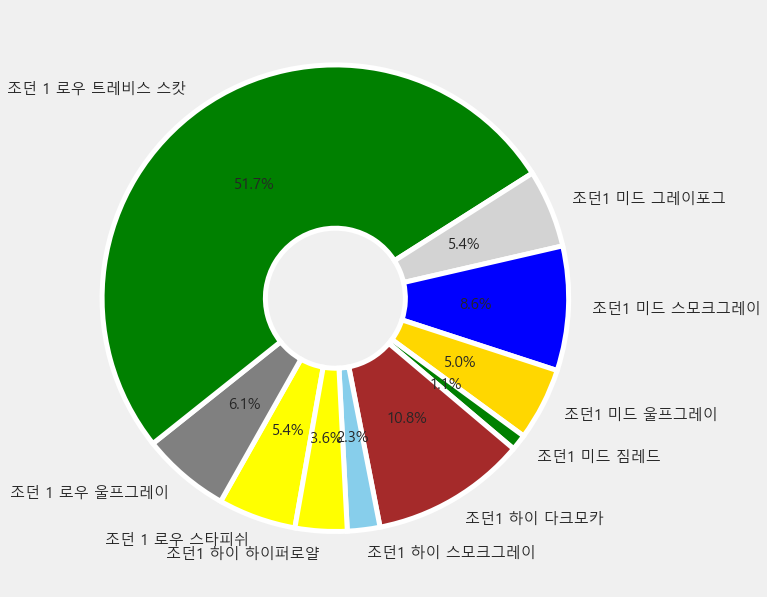

In [227]:
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["yellow","gray","green","lightgray","blue","gold","green", "brown", "skyblue"]

ax.pie(x = sub_j, labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :15}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

In [220]:
# 새상품 중고 상품 나누기 

df_j_new = df_j[df_j["used"]== 2 ] 
df_j_used = df_j[df_j["used"]== 1 ] 

df_j_new_sub = df_j_new.groupby("product_name")["price"].median() - df_j.groupby("product_name")["release_price"].median()
df_j_used_sub = df_j_used.groupby("product_name")["price"].median() - df_j.groupby("product_name")["release_price"].median()

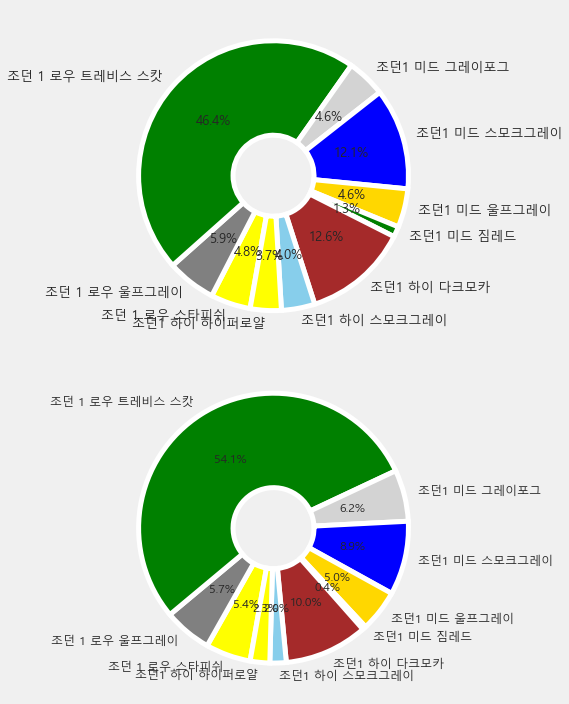

In [222]:
fig , axes  = plt.subplots(2,1, figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["yellow","gray","green","lightgray","blue","gold","green", "brown", "skyblue"]


axes[0].pie(x = df_j_new_sub,labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

axes[1].pie(x = df_j_used_sub, labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :12}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다


fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.tight_layout()
plt.show()

In [138]:
set(df["brand"])

{'나이키', '뉴발란스', '조던'}

In [140]:
df_b = df[df["brand"]== "뉴발란스"]

In [148]:
df_b.groupby("product_name")["price"].median().sort_values(ascending =False)

product_name
뉴발란스 992 그레이      340000
뉴발란스 992 화이트실버    305000
뉴발란스 992 네이비      270000
뉴발란스 992 블랙그레이    260000
뉴발란스 993 그레이      239000
뉴발란스 993 네이비      150000
뉴발란스 993 블랙       150000
Name: price, dtype: int64

In [150]:
df_b.groupby("product_name")["release_price"].median().sort_values(ascending =False)

product_name
뉴발란스 992 그레이      259000
뉴발란스 992 네이비      259000
뉴발란스 992 블랙그레이    259000
뉴발란스 992 화이트실버    259000
뉴발란스 993 그레이      182700
뉴발란스 993 네이비      182700
뉴발란스 993 블랙       182700
Name: release_price, dtype: int64

In [151]:
sub_b = df_b.groupby("product_name")["price"].median()- df_b.groupby("product_name")["release_price"].median()

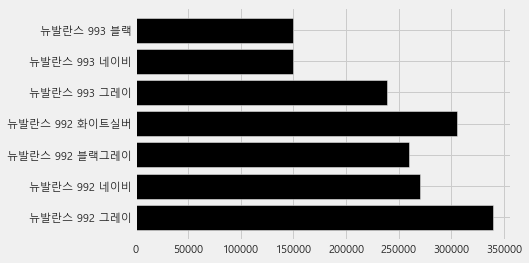

In [258]:
fig , ax  = plt.subplots()

ax.barh(df_b.groupby("product_name")["price"].median().index, 
        df_b.groupby("product_name")["price"].median().values, color ="black")


plt.show()

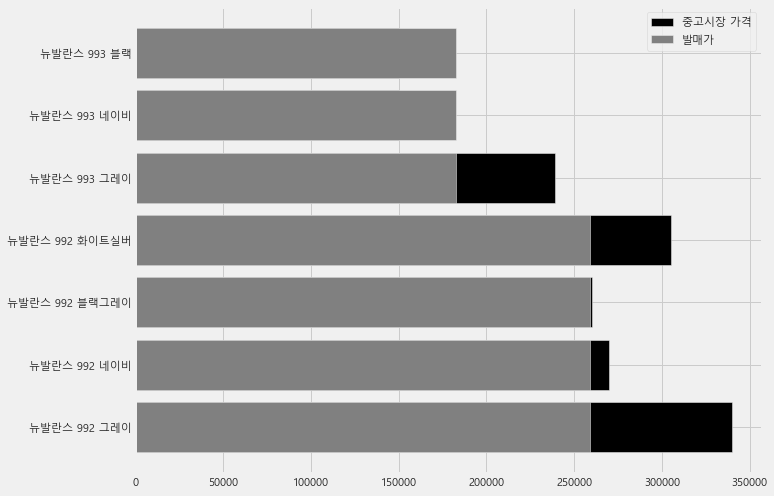

In [261]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_b.groupby("product_name")["price"].median().index, 
        df_b.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_b.groupby("product_name")["release_price"].median().index, 
       df_b.groupby("product_name")["release_price"].median().values, label ="발매가", color ="gray")

plt.legend()
plt.show()


In [166]:
df_b_new = df_b[df_b["used"]== 2 ] 

In [167]:
df_b_used = df_b[df_b["used"]== 1 ] 

In [168]:
df_b_used.groupby("product_name")["price"].median().sort_values(ascending =False)

product_name
뉴발란스 992 그레이      320000
뉴발란스 992 화이트실버    280000
뉴발란스 992 네이비      249500
뉴발란스 992 블랙그레이    245000
뉴발란스 993 그레이      200000
뉴발란스 993 블랙       150000
뉴발란스 993 네이비      140000
Name: price, dtype: int64

In [169]:
df_b_new.groupby("product_name")["price"].median().sort_values(ascending =False)

product_name
뉴발란스 992 그레이      350000
뉴발란스 992 네이비      312500
뉴발란스 992 화이트실버    310000
뉴발란스 992 블랙그레이    280000
뉴발란스 993 그레이      260000
뉴발란스 993 네이비      224500
뉴발란스 993 블랙       205000
Name: price, dtype: int64

In [171]:
df_b_new_sub = df_b_new.groupby("product_name")["price"].median() - df_b.groupby("product_name")["release_price"].median()

In [187]:
df_b_used_sub = df_b_used.groupby("product_name")["price"].median() - df_b.groupby("product_name")["release_price"].median() 
df_b_used_sub

product_name
뉴발란스 992 그레이      61000
뉴발란스 992 네이비      -9500
뉴발란스 992 블랙그레이   -14000
뉴발란스 992 화이트실버    21000
뉴발란스 993 그레이      17300
뉴발란스 993 네이비     -42700
뉴발란스 993 블랙      -32700
dtype: int64

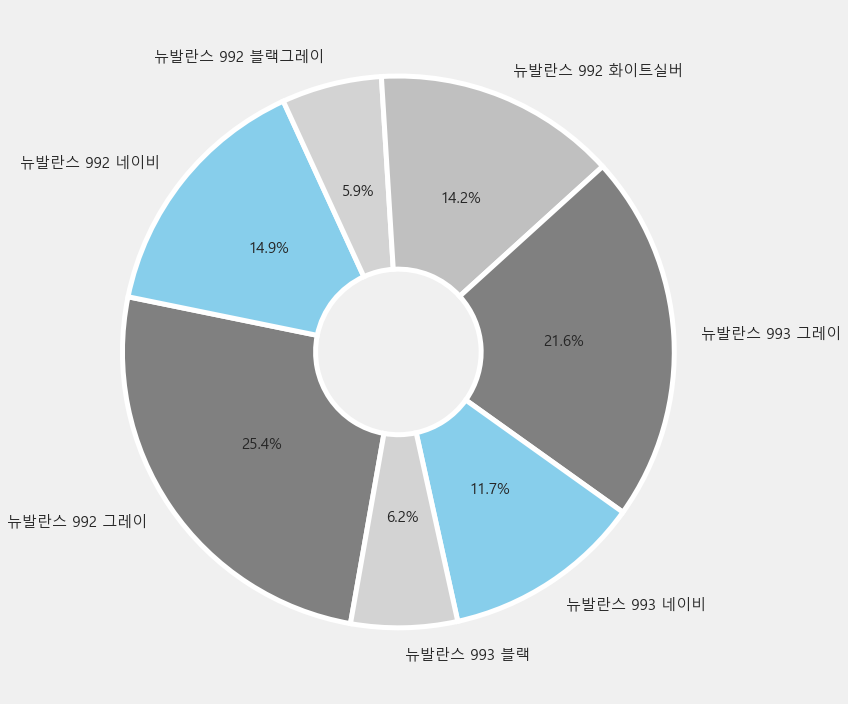

In [247]:
fig , ax = plt.subplots(figsize = (13,10))

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gray","skyblue","lightgray","silver","gray","skyblue","lightgray", "brown", "skyblue"]

ax.pie(x = df_b_new_sub, labels = df_b.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      , startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :15}, colors = colors)



# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.show()

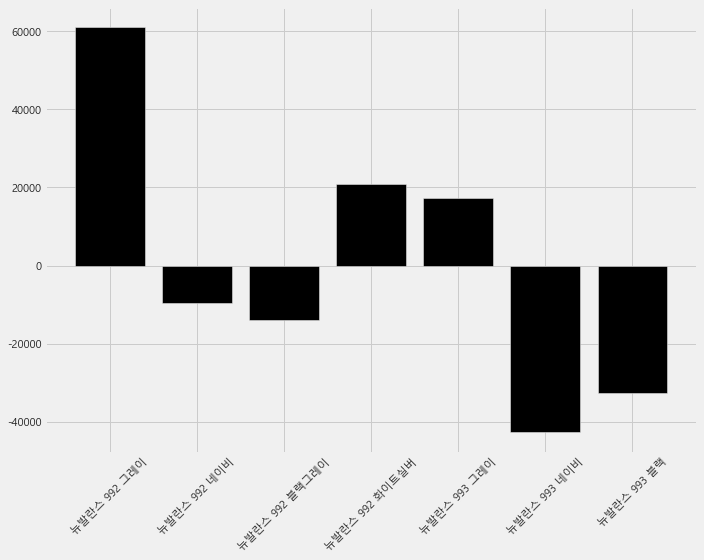

In [255]:
fig , ax = plt.subplots(figsize = (10,8))

ax.bar(df_b_used_sub.index,df_b_used_sub.values, color ="black")
plt.xticks(rotation =45)

fig.tight_layout()
plt.show()

In [288]:
df_n_used_high = df_n_used[(df_n_used["product_name"] == "나이키 덩크로우 코스트") | (df_n_used["product_name"] == "나이키 덩크로우 바시티 그린")]

In [289]:
df_n_used_high.groupby(["product_name", "size"])["price"].median()

product_name  size
나이키 덩크로우 코스트  225     240000
              230     327500
              235     260000
              240     274000
              245     257500
              250     249500
              260     230000
              265     230000
              270     259500
              275     200000
              280     219500
              285     260000
              290     334000
Name: price, dtype: int64

In [4]:
df = pd.read_csv('./00_data/bunjang/rawdata_Final.csv')
df

,Unnamed: 0,pid,uid,brand,product_name,product_type,color,size,price,release_price,datetime,date,location1,location2,status,used,name
0,0,169499712,10473233,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,265,190000,129000,2021-11-11 19:58:01,2021-11-11,인천광역시,남동구,0,2,(가격내림)나이키 덩크 하이 레트로 챔피언쉽 네이비 265사이즈 팔아요.
1,1,169629181,8587620,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,260,220000,129000,2021-11-11 19:50:49,2021-11-11,서울특별시,금천구,0,2,[260] 나이키 덩크하이 레트로 챔피언쉽 네이비
2,2,169097255,76575156,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,260,160000,129000,2021-11-11 18:56:55,2021-11-11,인천광역시,부평구,0,1,나이키 덩크하이 레트로 챞피언쉽 네이비 260
3,3,169073677,76575156,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,260,160000,129000,2021-11-11 18:56:49,2021-11-11,인천광역시,부평구,0,1,나이키 덩크하이 챔피언쉽 네이비 260
4,4,168877311,2312006,나이키,나이키 덩크하이 네이비,나이키 덩크하이,네이비,265,270000,129000,2021-11-11 16:34:42,2021-11-11,경상남도,김해시,0,1,나이키 덩크 하이 네이비 265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,7616,161679574,7326303,조던,조던 1 로우 트레비스 스캇,조던 1 로우,트레비스 스캇,300,2500000,189000,2021-08-13 18:25:39,2021-08-13,서울특별시,영등포구,3,1,트레비스스캇 조던 1 로우 300 교환환영
7617,7617,161671344,11927253,조던,조던 1 로우 트레비스 스캇,조던 1 로우,트레비스 스캇,270,1750000,189000,2021-08-13 16:56:33,2021-08-13,NUL,NUL,3,1,나이키 프라그먼트트레비스스캇 조던1 로우270
7618,7618,161671038,12558916,조던,조던 1 로우 트레비스 스캇,조던 1 로우,트레비스 스캇,260,1800000,189000,2021-08-13 16:53:23,2021-08-13,경기도,고양시,3,1,조던1 트레비스캇 프라그먼트 레트로 로우 OG sp 밀리터리 블루 260
7619,7619,161653518,7508376,조던,조던 1 로우 트레비스 스캇,조던 1 로우,트레비스 스캇,275,1900000,189000,2021-08-13 13:45:52,2021-08-13,강원도,양구군,3,1,에어 조던 로우1 트레비스캇 275


In [11]:
sp = df.loc[:,['size','price']]


In [12]:
corr = sp.corr()
corr

,size,price
size,1.000000,0.005312
price,0.005312,1.000000
